1a) Check out the hepatitis dataset from the UCI ML repository and read the description. This dataset contains missing values in categorical and continuous features. The files are also available in the /data folder. 

https://archive.ics.uci.edu/ml/datasets/hepatitis

Read in hepatitis.data into a pandas data frames with column names. (1 point)

Encode the missing categories as 'missing' using the SimpleImputer, and preprocess the categotical features with the OneHot Encoder. (3 points)

Preprocess the target variable ('Class'). (2 points)


In [1]:
import pandas as pd
import numpy  as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [2]:
# insert your code here
column_name = ['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA',
               'LIVER BIG', 'LIVER FIRM','SPLEEN PALPABLE', 'SPIDERS','ASCITES', 'VARICES',
               'BILIRUBIN','ALK PHOSPHATE', 'SGOT','ALBUMIN','PROTIME','HISTOLOGY']
df = pd.read_csv('data/hepatitis.data', names = column_name)

# Encode the missing categories as 'missing' using the SimpleImputer
# preprocess the categotical features with the OneHot Encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
si = SimpleImputer(missing_values = '?', strategy='constant',fill_value='missing')
ohe_name = ['SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA',
              'LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES',
              'HISTOLOGY']
ohe_value = ohe.fit_transform(si.fit_transform(df[ohe_name]))
ohe_ftr_names = ohe.get_feature_names(ohe_name)
df_ohe = pd.DataFrame(data=ohe_value,columns = ohe_ftr_names)
df_ohe.head()

,SEX_1,SEX_2,STEROID_1,STEROID_2,STEROID_missing,ANTIVIRALS_1,ANTIVIRALS_2,FATIGUE_1,FATIGUE_2,FATIGUE_missing,...,SPIDERS_2,SPIDERS_missing,ASCITES_1,ASCITES_2,ASCITES_missing,VARICES_1,VARICES_2,VARICES_missing,HISTOLOGY_1,HISTOLOGY_2
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [3]:
# Preprocess the target variable ('Class')
le = LabelEncoder()
le_value = le.fit_transform(df[['Class']].values.ravel())
target_v = pd.DataFrame(le_value, columns = ['Class'])
target_v.head()

,Class
0,1
1,1
2,1
3,1
4,1


1b) 

Replace the missing values ('?') with np.nan in the continuous features. (2 points)

Apply multivariate imputation to the preprocessed dataframe, create five different imputed datasets, and save them as csv files. (4 points)

In [4]:
# insert your code here
# Replace the missing values ('?') with np.nan in the continuous features
num_name = ['AGE','BILIRUBIN','ALK PHOSPHATE', 'SGOT','ALBUMIN','PROTIME']
df_num = df[num_name].replace('?',np.NaN)
df_num.head()

,AGE,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME
0,30,1.00,85,18,4.0,NaN
1,50,0.90,135,42,3.5,NaN
2,78,0.70,96,32,4.0,NaN
3,31,0.70,46,52,4.0,80
4,34,1.00,NaN,200,4.0,NaN


In [5]:
df_new = pd.concat([df_ohe, df_num], axis = 1)
clms = df_new.columns

X = df_new[clms].values

for i in range(5):
    imputer = IterativeImputer(estimator = RandomForestRegressor(n_estimators = 100),random_state=i)
    X_impute = imputer.fit_transform(X)
    X_df = pd.DataFrame(X_impute)
    df_n = pd.concat([X_df, target_v], axis = 1)
    file_name = '1b_' + str(i) + '.csv'
    df_n.to_csv(file_name)

/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Problem 1a: Please load one of the imputed hepatitis datasets you created in HW2. You can also use the file in /data/hepatitis_imputed_0.csv if you prefer.

Apply PCA to the feature matrix (exclude the target variable 'Class'), transform the data, print the first two principal component coordinates of the first 5 data points. (4 points)

Please prepare a scatter plot that shows the first two components on the x and y axes of the figure, and the color of the points illustrate the class of the data points. (2 points)

How much varience is retained by the first two components? (2 points)

How many components should we keep to retain at least 99% of the variance? (2 points)

In [7]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

**Apply PCA to the feature matrix (exclude the target variable 'Class'), transform the data, print the first two principal component coordinates of the first 5 data points.**

In [8]:
df = pd.read_csv("data/hepatitis_imputed_0.csv")
# df.head()
y = df['Class']
df_new = df.drop(columns=['Class'], inplace = False)

pca = PCA(n_components=df_new.shape[1])
X_pca = pca.fit_transform(df_new)
X_pca[:5, :2]

array([[-73.12352385,  -8.69313643],
       [-39.01627001,  38.67189085],
       [-56.03730274,   1.84535739],
       [-46.58642787, -52.76043824],
       [103.75950366, -55.54187772]])

**Please prepare a scatter plot that shows the first two components on the x and y axes of the figure, and the color of the points illustrate the class of the data points. (2 points)**

<function matplotlib.pyplot.show(*args, **kw)>

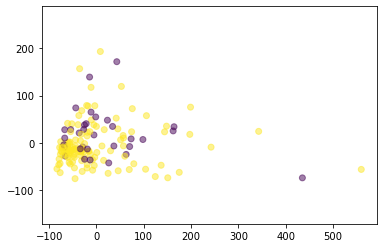

In [9]:
X_df = pd.DataFrame(X_pca)
x_scatter = X_df[0]
y_scatter = X_df[1]
plt.scatter(x_scatter, y_scatter, alpha = 0.5, c = y)
plt.axis('equal')
plt.show

**How much varience is retained by the first two components? (2 points)**

In [10]:
sum(pca.explained_variance_ratio_[:2])

0.9529446017988041

**How many components should we keep to retain at least 99% of the variance? (2 points)**

In [12]:
sum(np.cumsum(pca.explained_variance_ratio_) < 0.99) + 1

4

**1b) Open the hepatitis csv file. Please note that the continuous features are not scaled! Scale the continuous features (2 points) and repeat the PCA analysis you just performed in 1a on the preprocessed dataset (0 points).**

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
num_ftrs = ['AGE', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']
ss = StandardScaler()
num_values = ss.fit_transform(df[num_ftrs])
df_num = pd.DataFrame(data=num_values,columns = num_ftrs)
df_remain = df[['x0_1', 'x0_2', 'x1_1', 'x1_2', 'x1_missing', 'x2_1', 'x2_2', 'x3_1',
       'x3_2', 'x3_missing', 'x4_1', 'x4_2', 'x4_missing', 'x5_1', 'x5_2',
       'x5_missing', 'x6_1', 'x6_2', 'x6_missing', 'x7_1', 'x7_2',
       'x7_missing', 'x8_1', 'x8_2', 'x8_missing', 'x9_1', 'x9_2',
       'x9_missing', 'x10_1', 'x10_2', 'x10_missing', 'x11_1', 'x11_2',
       'x11_missing', 'x12_1', 'x12_2']]
df_pre = pd.concat([df_remain, df_num, df['Class']], axis = 1)

In [15]:
y = df_pre['Class']
df_p_new = df_pre.drop(columns=['Class'], inplace = False)

pca_n = PCA(n_components=df_p_new.shape[1])
X_pca_n = pca_n.fit_transform(df_p_new)
X_pca_n[:5, :2]

array([[-1.8258188 ,  0.19729835],
       [ 0.06564394, -0.96036384],
       [-0.56164936, -2.42034047],
       [-2.2757841 ,  0.01859807],
       [-1.27538442,  0.89690843]])

<function matplotlib.pyplot.show(*args, **kw)>

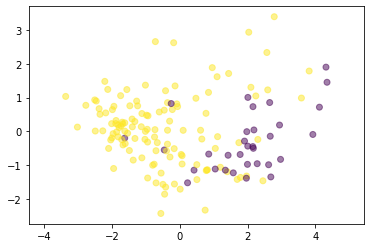

In [16]:
X_df_n = pd.DataFrame(X_pca_n)
x_scatter = X_df_n[0]
y_scatter = X_df_n[1]
plt.scatter(x_scatter, y_scatter, alpha = 0.5, c = y)
plt.axis('equal')
plt.show

0.3754932506507792
20


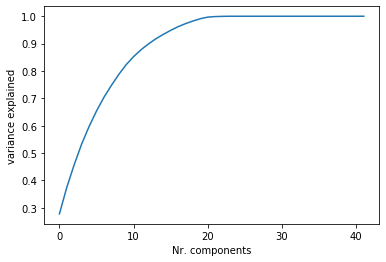

In [17]:
print(sum(pca_n.explained_variance_ratio_[:2]))
print(sum(np.cumsum(pca_n.explained_variance_ratio_) < 0.99)+1)

plt.plot(np.cumsum(pca_n.explained_variance_ratio_))
plt.xlabel('Nr. components')
plt.ylabel('variance explained')
plt.show()

**PCA is one of the ML algorithms for which preprocessing is crucial! PCA will not give you an error message if you apply it to unprocessed data but the results will be weird. Your data needs to be preprocessed and scaled before you apply PCA on it. Please write 1-2 paragraphs describing the differences you observe in the 1a and 1b results and figures and explain why preprocessing changed the results so much. (4 points)**  

**Explaination:**   

![pic](explain.png)
